In [16]:
import pandas as pd
import feather
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [5]:
rootdir = Path().resolve().parent

df = feather.read_dataframe(rootdir / "data/cache/df/ppo_df_1min.feather")
df.head()

,timestamp,close,high,low,volume,buy_price,sell_price,open,ChaikinMoneyFlowIndicator_cmf_1,EaseOfMovementIndicator_em_1,...,ADXIndicator_adx_1,ADXIndicator_adx_pos_1,ADXIndicator_adx_neg_1,CCIIndicator_cci_1,AroonIndicator_aroon_up_1,AroonIndicator_aroon_down_1,AroonIndicator_aroon_ind_1,PSARIndicator_psar_up_indicator_1,PSARIndicator_psar_down_indicator_1,fold
0,1609431120,28695,28728,28695,2390860,28728,28695,28715.0,-0.139627,-0.051642,...,-0.101729,-0.093720,0.287760,-0.290577,0.041667,0.541667,-0.340909,0.0,0.0,0.0
1,1609431180,28663,28696,28638,5284654,28696,28638,28695.0,-0.256741,-0.166121,...,-0.060929,-0.201299,0.536105,-0.455990,0.000000,0.541667,-0.363636,0.0,0.0,0.0
2,1609431240,28658,28663,28658,1168797,28663,28658,28663.0,-0.263944,-0.009458,...,-0.023044,-0.209535,0.515984,-0.447315,-0.041667,0.541667,-0.386364,0.0,0.0,0.0
3,1609431300,28621,28659,28621,1927014,28659,28621,28658.0,-0.276182,-0.137501,...,0.030349,-0.268712,0.654214,-0.526875,-0.083333,0.541667,-0.409091,0.0,0.0,0.0
4,1609431360,28606,28621,28576,5952711,28621,28576,28621.0,-0.183910,-0.106709,...,0.097142,-0.327785,0.800759,-0.617085,-0.125000,0.541667,-0.431818,0.0,0.0,0.0


In [6]:
df["bspread"] = df["high"] / df["close"] - 1
df["sspread"] = df["low"] / df["close"] - 1

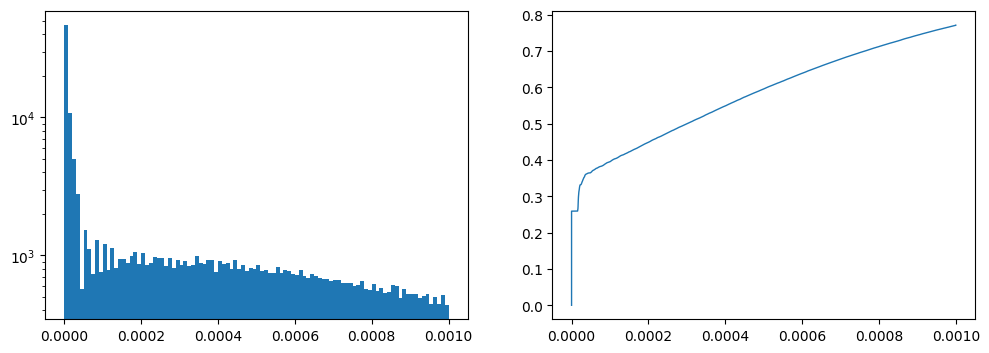

In [21]:
y = df["bspread"].values
y = y[y <= 0.001]
y = np.sort(y)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax = axes[0]
ax.hist(y, bins=100)
ax.set_yscale("log")

ax = axes[1]
ax.plot(y, np.arange(len(y)) / df.shape[0], lw=1)

plt.show()

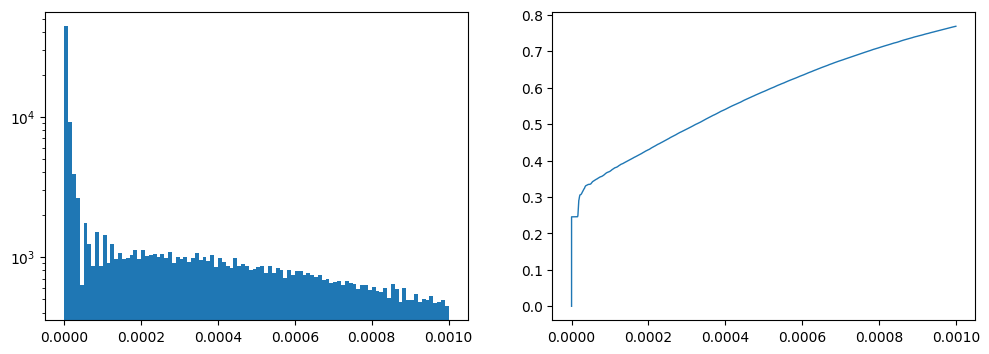

In [24]:
y = -df["sspread"].values
y = y[y <= 0.001]
y = np.sort(y)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax = axes[0]
ax.hist(y, bins=100)
ax.set_yscale("log")

ax = axes[1]
ax.plot(y, np.arange(len(y)) / df.shape[0], lw=1)

plt.show()